In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


In [141]:
df = pd.read_csv("/Users/johnmadrid/GitHub/MLinPractice/data/preprocessing/labeled.csv")

# df.head()
df.columns
df.describe()

/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src
count,2.958110e+05,2.958110e+05,295811.0,2.958110e+05,295811.000000,295811.000000,295811.000000,295811.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.006738e+17,9.005867e+17,530.0,1.889460e+16,1.252979,10.696654,25.175169,0.417577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.346015e+17,3.345864e+17,0.0,1.282434e+17,32.303915,135.039128,691.916817,0.493161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.274159e+09,7.274159e+09,530.0,1.300000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.642389e+17,6.642054e+17,530.0,2.507159e+07,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.609692e+17,9.609133e+17,530.0,1.975334e+08,0.000000,2.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.179042e+18,1.179002e+18,530.0,5.345640e+08,0.000000,8.000000,10.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.382118e+18,1.382118e+18,530.0,1.361346e+18,5811.000000,24699.000000,151373.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Variance can help us identify which features values change the most. Those that have
# a low variance means numbers stay pretty much same and will probably not tell us much.
# On the contrary, those with high variance can tell us what us going on with the data.
pd.DataFrame({"Variance": df.var()})

,Variance
id,1.119582e+35
conversation_id,1.119481e+35
timezone,0.000000e+00
user_id,1.644637e+34
replies_count,1.043543e+03
retweets_count,1.823557e+04
likes_count,4.787489e+05
retweet,0.000000e+00
video,2.432073e-01
near,NaN


In [85]:
scatter = df[["likes_count", "replies_count", "retweets_count", "language", "video", "label", "date", "time"]]
scatter["photos"] = df["photos"].map(lambda x: len(x[1:-1].split(', ')))
scatter["urls"] = df["urls"].map(lambda x: len(x[1:-1].split(', ')))
scatter["hashtags"] = df["hashtags"].map(lambda x: len(x[1:-1].split(', ')))

scatter.dtype()

/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

AttributeError: 'DataFrame' object has no attribute 'dtype'

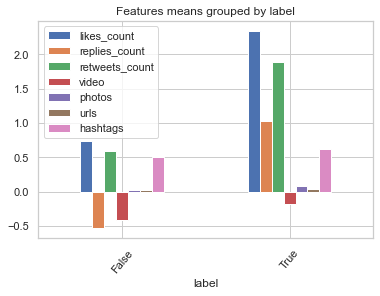

In [86]:
# groups means by label
grouped_mean_lang = scatter.groupby('label').mean()
# grouped_std_lang = scatter.groupby('label').std()

np.log10(grouped_mean_lang).plot(kind='bar')
plt.xticks(rotation=50)
plt.title("Features means grouped by label")
plt.show()


Text(0.5, 1.0, 'Feature mean by label')

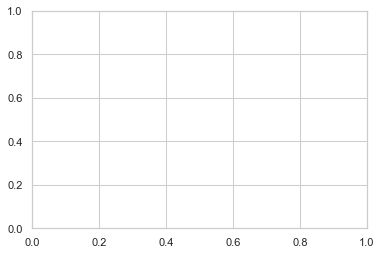

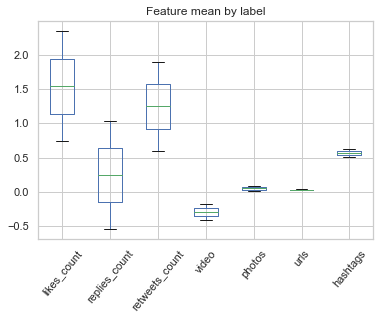

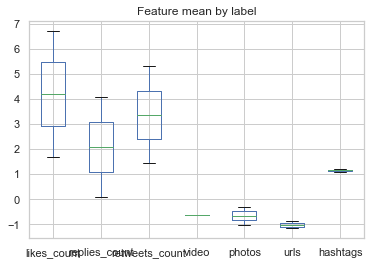

In [87]:
# group mean and variance by label which show interesting features to be those to the left
group_means_label = scatter.groupby('label').mean()
group_var_label = scatter.groupby('label').var()
plt.subplots()
np.log10(group_means_label).plot(kind='box')
plt.xticks(rotation=50)
plt.title("Feature mean by label")
np.log10(group_var_label).plot(kind='box')
plt.title("Feature mean by label")


In [88]:
groups = scatter.groupby('label')

print(groups)

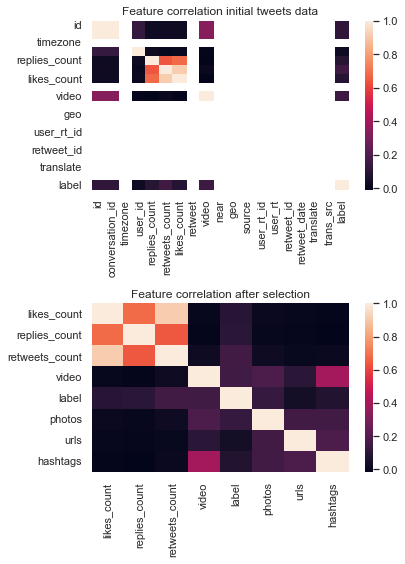

In [89]:
# Heatmap help us find the correlation between the different data features (fig. top)
# Heat map correlation of features after selection (fig. bottom)
import seaborn as sn
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

sn.heatmap(df.corr(), ax=ax1)
ax1.set_title("Feature correlation initial tweets data")
sn.heatmap(scatter.corr(), ax=ax2)
ax2.set_title("Feature correlation after selection")
fig.tight_layout()
# plt.savefig("feature_selection_by_correlation.png")
plt.show()

In [ ]:
# sn.pairplot(scatter.sample(500), hue="label")
# plt.savefig("feature_selection_by_correlation_pairplot.png")

In [118]:
def scatterviral(groups, x, y, xlog = False, ylog = False, plot_title = ""):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')

    for name, group in groups:
        ax.plot(group[x], group[y], marker='o', linestyle='', ms=1, label=name, alpha = 0.1)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.title.set_text(plot_title)
    L = ax.legend()
    L.get_texts()[0].set_text("Not-viral")
    L.get_texts()[1].set_text("Viral")


    # plt.savefig("retweets_count_as_function_of_likes_count.png")
    plt.show()

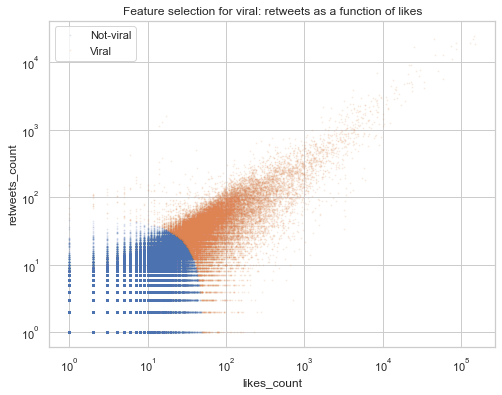

In [119]:
scatterviral(groups, 'likes_count', 'retweets_count', True, True, plot_title = "Feature selection for viral: retweets as a function of likes")


In [109]:
# scatterviral(groups, 'time', 'likes_count', False, True)

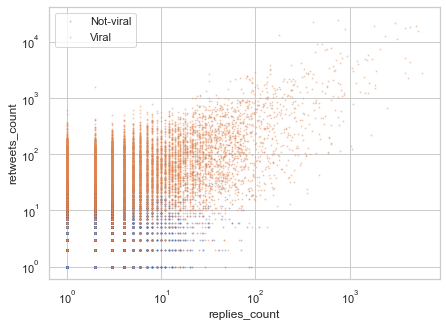

In [98]:
scatterviral(groups, "replies_count", 'retweets_count', True, True)

In [149]:
def describe(data):
    df = data
    likes_to_viral = df[["likes_count", "label"]]
    retweets_to_viral = df[["retweets_count", "label"]]
    replies_to_viral = df[["replies_count", "label"]]

    likes_groups = likes_to_viral.groupby('label')
    retweets_groups = retweets_to_viral.groupby('label')
    replies_groups = replies_to_viral.groupby('label')

    likes_groups.describe()
    retweets_groups.describe()
    replies_groups.describe()

In [150]:
describe(scatter)

      likes_count                                                           
            count        mean          std  min   25%   50%    75%       max
label                                                                       
False    268651.0    5.419749     6.847849  0.0   1.0   3.0    8.0      49.0
True      27160.0  220.584352  2274.185469  0.0  38.0  56.0  107.0  151373.0
      likes_count                                                           
            count        mean          std  min   25%   50%    75%       max
label                                                                       
False    268651.0    5.419749     6.847849  0.0   1.0   3.0    8.0      49.0
True      27160.0  220.584352  2274.185469  0.0  38.0  56.0  107.0  151373.0
      likes_count                                                           
            count        mean          std  min   25%   50%    75%       max
label                                                                       

In [128]:
likes_groups.describe()
# Learning: Likely not viral if likes < 50

likes_count                                                           
            count        mean          std  min   25%   50%    75%       max
label                                                                       
False    268651.0    5.419749     6.847849  0.0   1.0   3.0    8.0      49.0
True      27160.0  220.584352  2274.185469  0.0  38.0  56.0  107.0  151373.0

In [129]:
retweets_groups.describe()
# Learning: Likely not viral if retweets < 47

retweets_count                                                       
               count       mean         std  min   25%   50%   75%      max
label                                                                      
False       268651.0   3.977279    5.309888  0.0   0.0   2.0   6.0     46.0
True         27160.0  77.160825  439.857604  0.0  25.0  36.0  59.0  24699.0

In [130]:
replies_groups.describe()
# Learning: Does not explain virality as well, given percentile distributions are flat between true and false labelled tweets

replies_count                                                   
              count       mean         std  min  25%  50%  75%     max
label                                                                 
False      268651.0   0.291467    1.125718  0.0  0.0  0.0  0.0   110.0
True        27160.0  10.763697  106.084441  0.0  0.0  1.0  3.0  5811.0

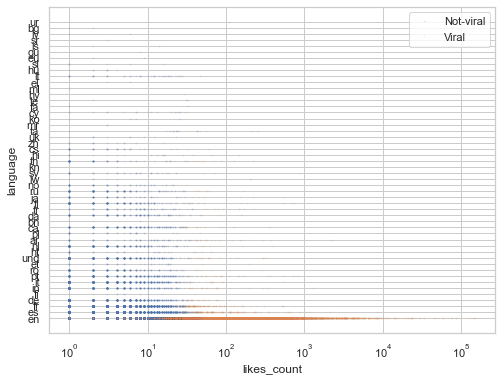

In [131]:
scatterviral(groups, 'likes_count', 'language', True, False)
# Learning: much more likely to be viral with < 50 likes if language is 'en'

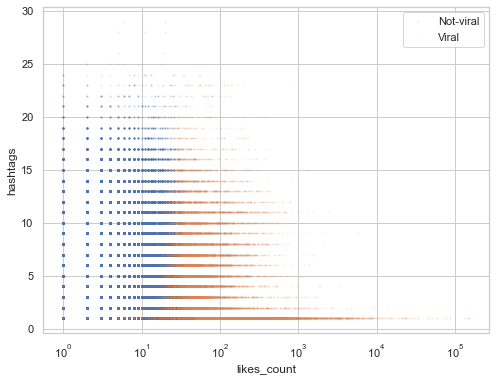

In [132]:
scatterviral(groups, 'likes_count', 'hashtags', True, False)


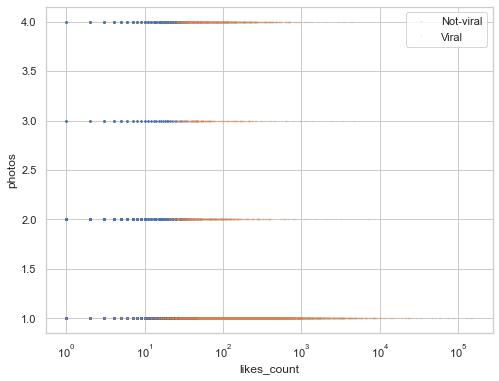

In [133]:
scatterviral(groups, 'likes_count', 'photos', True, False)

In [134]:
# filter by viral tweets
viral = likes_to_viral[likes_to_viral["label"] == 1]

viral["likes_count"].mean()

220.58435198821797

In [135]:
count = viral["likes_count"].value_counts()


count

33.0      509
35.0      506
38.0      501
36.0      495
32.0      475
         ... 
660.0       1
726.0       1
1452.0      1
1175.0      1
2090.0      1
Name: likes_count, Length: 1443, dtype: int64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='[0]', ylabel='[0]'>

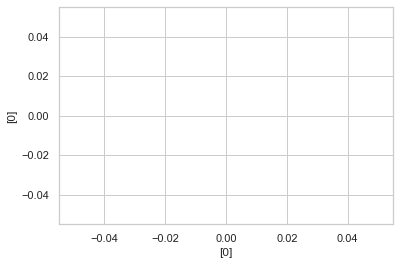

In [136]:
viral.plot.scatter(pd.DataFrame(['likes_count']), pd.DataFrame(['retweets_count']))

In [138]:
def count_tweets_per_creation_date(data):
    data['tweets_per_year'] = pd.DataFrame(pd.DatetimeIndex(data['date']).year.values)
    data['tweets_per_month'] = pd.DataFrame(pd.DatetimeIndex(data['date']).month.values)
    data['tweets_per_day'] = pd.DataFrame(pd.DatetimeIndex(data['date']).day.values)
    data['tweets_per_hour'] = pd.DataFrame(pd.DatetimeIndex(data['time']).hour.values)

    column_dates = ["tweets_per_year", "tweets_per_month","tweets_per_day","tweets_per_hour"]
    plt.figure(figsize=(16,10))

    for i, name in enumerate(column_dates):
        plt.subplot(2,2, i+1)
        sn.histplot(data, x = name, discrete = True)
    plt.suptitle("Amount of tweets per creation date", fontsize=20)
    plt.savefig("tweets_amount_per_creation_date.png")

    plt.figure(figsize=(16,10))
    for i, name in enumerate(column_dates):
        plt.subplot(2,2, i+1)
        sn.countplot(name, data=data, hue='label')
    plt.suptitle("Virality of tweets per creation date", fontsize=20)
    plt.savefig("tweets_virality_per_creation_date.png")

/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

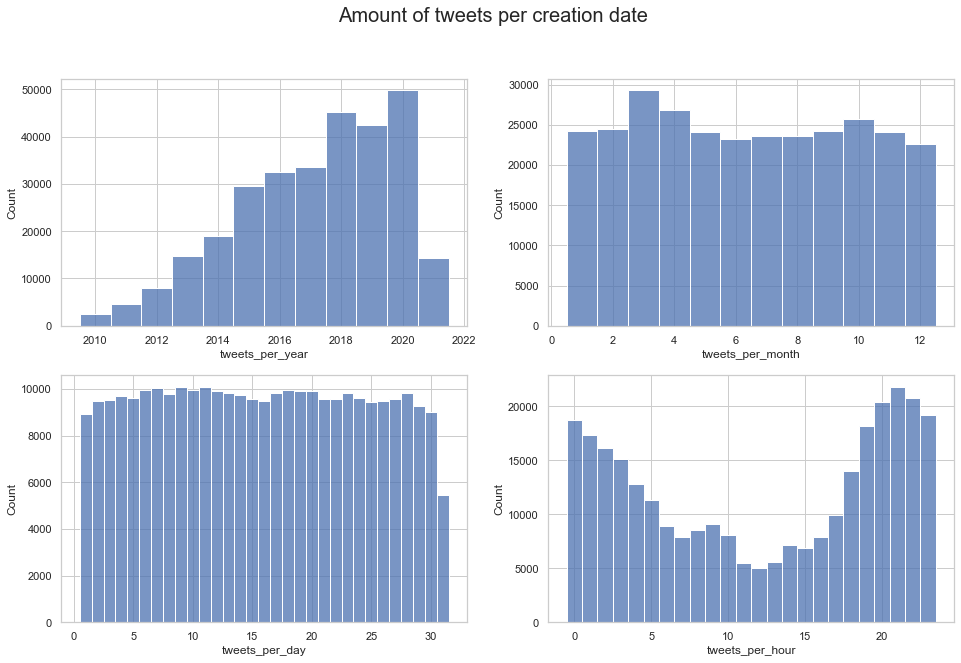

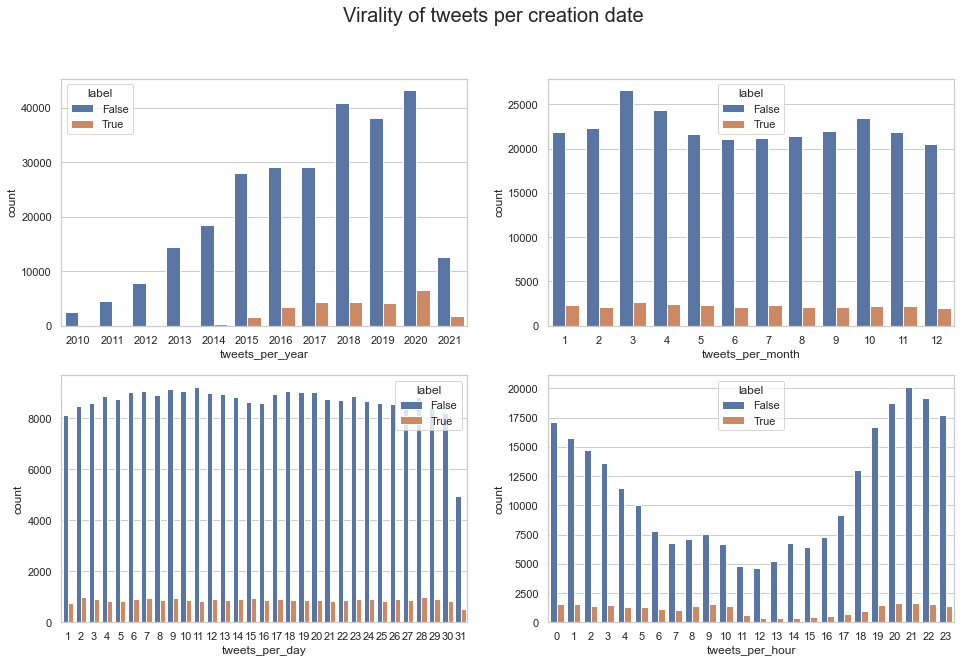

In [139]:
count_tweets_per_creation_date(scatter)

In [324]:
def viral_tweets_per_creation_date(data):
    data['tweets_per_year'] = pd.DataFrame(pd.DatetimeIndex(data['date']).year.values)
    data['tweets_per_month'] = pd.DataFrame(pd.DatetimeIndex(data['date']).month.values)
    data['tweets_per_day'] = pd.DataFrame(pd.DatetimeIndex(data['date']).day.values)
    data['tweets_per_hour'] = pd.DataFrame(pd.DatetimeIndex(data['time']).hour.values)

    column_dates = ["tweets_per_year", "tweets_per_month","tweets_per_day","tweets_per_hour"]
    plt.figure(figsize=(16,10))

    for i, name in enumerate(column_dates):
        plt.subplot(2,2, i+1)
        sn.countplot(name, data=data, hue='label')
    plt.suptitle("Virality of tweets per creation date", fontsize=20)
    plt.savefig("tweets_virality_per_creation_date.png")


/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

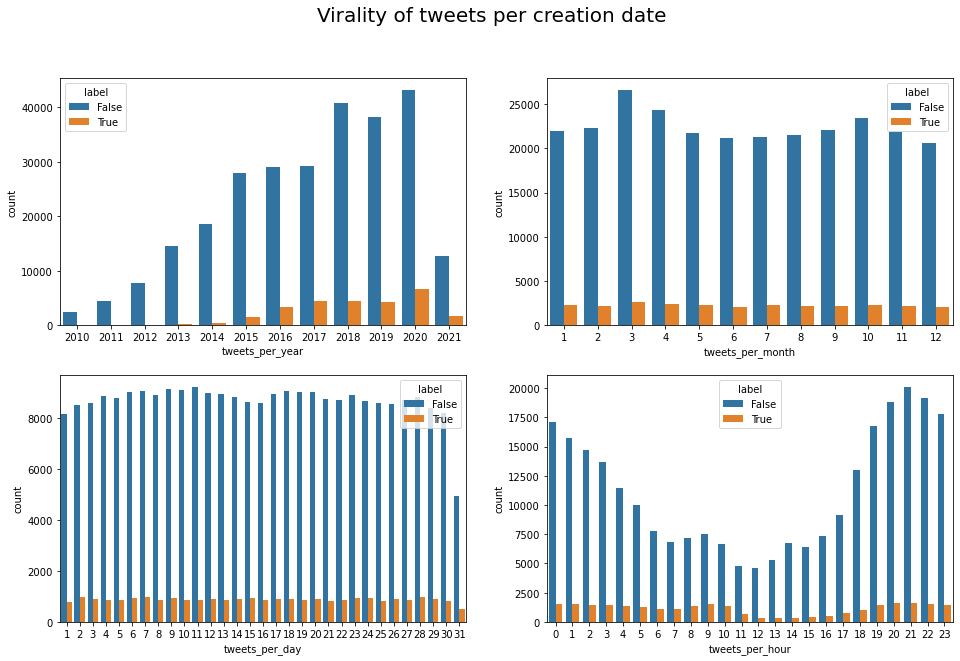

In [325]:
viral_tweets_per_creation_date(scatter)

151373.0